In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

In [18]:
# Import and parse data
df  = pd.read_csv("data.csv", sep = ';', parse_dates=["date"]).set_index('date')

,EW1,EW2
date,,
2021-08-10,455,NaN
2021-08-11,553,NaN
2021-08-12,569,NaN
2021-08-13,426,NaN
2021-08-14,536,NaN
...,...,...
2021-11-04,386,1490.0
2021-11-05,375,1067.0
2021-11-06,441,1591.0


Text(0.5, 0, 'Date')

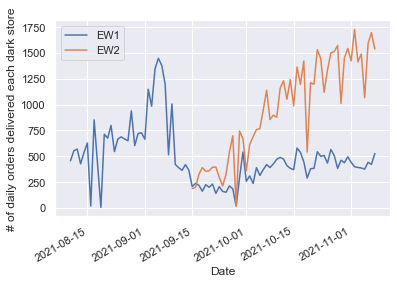

In [23]:
# Plot raw data
# Clear trends but we can apply some smoothing
df.plot()
plt.ylabel('# of daily orders delivered each dark store')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

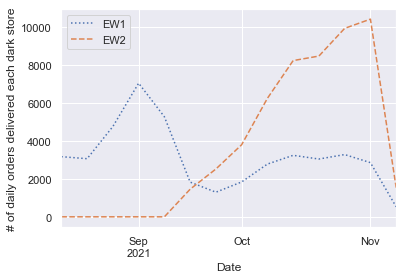

In [22]:
# Weekly resampling
weekly = df.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('# of daily orders delivered each dark store')
plt.xlabel('Date')


<AxesSubplot:xlabel='date'>

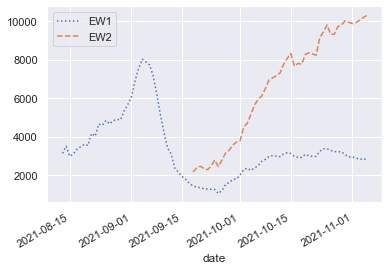

In [31]:
# Moving average to smooth out results
df.rolling(7, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])